<a href="https://colab.research.google.com/github/Lee-Gunju/AI-paper-code-review-for-personal-project/blob/master/Using_pre_trained_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    untar=True,
)

In [ ]:
data_path

'/root/.keras/datasets/news20.tar.gz'

In [ ]:
import os
import pathlib

data_dir = pathlib.Path(data_path).parent / "20_newsgroup"
dirnames = os.listdir(data_dir)
print("Number of directories:", len(dirnames))
print("Directory names:", dirnames)




Number of directories: 20
Directory names: ['sci.crypt', 'rec.sport.baseball', 'rec.motorcycles', 'talk.religion.misc', 'talk.politics.guns', 'sci.electronics', 'comp.os.ms-windows.misc', 'comp.windows.x', 'sci.space', 'alt.atheism', 'sci.med', 'talk.politics.misc', 'comp.sys.mac.hardware', 'rec.autos', 'talk.politics.mideast', 'misc.forsale', 'comp.sys.ibm.pc.hardware', 'comp.graphics', 'rec.sport.hockey', 'soc.religion.christian']


In [ ]:
fnames = os.listdir(data_dir / "comp.graphics")
print("Number of files in comp.graphics:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of files in comp.graphics: 1000
Some example filenames: ['38933', '39070', '38403', '38427', '38583']


In [ ]:
print(open(data_dir / 'comp.graphics' / '38987').read())

Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!agate!dog.ee.lbl.gov!network.ucsd.edu!usc!rpi!nason110.its.rpi.edu!mabusj
From: mabusj@nason110.its.rpi.edu (Jasen M. Mabus)
Subject: Looking for Brain in CAD
Message-ID: <c285m+p@rpi.edu>
Nntp-Posting-Host: nason110.its.rpi.edu
Reply-To: mabusj@rpi.edu
Organization: Rensselaer Polytechnic Institute, Troy, NY.
Date: Thu, 29 Apr 1993 23:27:20 GMT
Lines: 7

Jasen Mabus
RPI student

	I am looking for a hman brain in any CAD (.dxf,.cad,.iges,.cgm,etc.) or picture (.gif,.jpg,.ras,etc.) format for an animation demonstration. If any has or knows of a location please reply by e-mail to mabusj@rpi.edu.

Thank you in advance,
Jasen Mabus  



In [ ]:
samples = []
labels = []
class_names = []
class_index = 0
for dirname in sorted(os.listdir(data_dir)):
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    print("Processing %s, %d files found" % (dirname, len(fnames)))
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")
        lines = lines[10:]
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1

print("Classes:", class_names)
print("Number of samples:", len(samples))

Processing alt.atheism, 1000 files found
Processing comp.graphics, 1000 files found
Processing comp.os.ms-windows.misc, 1000 files found
Processing comp.sys.ibm.pc.hardware, 1000 files found
Processing comp.sys.mac.hardware, 1000 files found
Processing comp.windows.x, 1000 files found
Processing misc.forsale, 1000 files found
Processing rec.autos, 1000 files found
Processing rec.motorcycles, 1000 files found
Processing rec.sport.baseball, 1000 files found
Processing rec.sport.hockey, 1000 files found
Processing sci.crypt, 1000 files found
Processing sci.electronics, 1000 files found
Processing sci.med, 1000 files found
Processing sci.space, 1000 files found
Processing soc.religion.christian, 997 files found
Processing talk.politics.guns, 1000 files found
Processing talk.politics.mideast, 1000 files found
Processing talk.politics.misc, 1000 files found
Processing talk.religion.misc, 1000 files found
Classes: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.ha

In [ ]:
# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(samples)
rng = np.random.RandomState(seed)
rng.shuffle(labels)

In [ ]:
# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)


In [ ]:
vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'to', 'of', 'a', 'and', 'in', 'is', 'i']

In [ ]:
output = vectorizer([["the cat sat on the mat"]])

In [ ]:
output[0, :6]

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([   2, 3748, 1763,   15,    2, 6751])>

In [ ]:
voc = vectorizer.get_vocabulary()

In [ ]:
word_index = dict(zip(voc, range(len(voc))))


In [ ]:
test = ["the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

[2, 3748, 1763, 15, 2, 6751]

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-03-18 07:13:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-18 07:13:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-18 07:13:39--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

glove

In [ ]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

FileNotFoundError: ignored

In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 0 words (20000 misses)


In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(num_tokens, embedding_dim, embeddings_initializer = keras.initializers.Constant(embedding_matrix),
                            trainable = False,)




In [ ]:
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None, ), dtype='int64')
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 100)         2000200   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         82048 

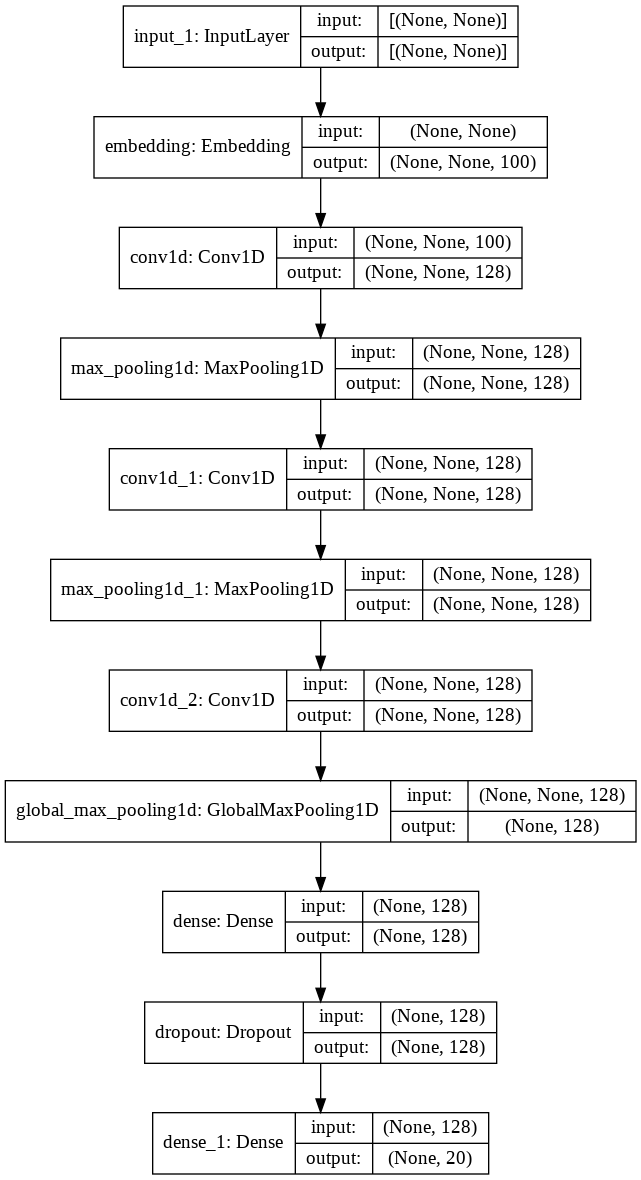

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
125/125 [==============================] - 34s 14ms/step - loss: 2.9959 - acc: 0.0488 - val_loss: 2.9958 - val_acc: 0.0503
Epoch 2/20
125/125 [==============================] - 1s 10ms/step - loss: 2.9958 - acc: 0.0494 - val_loss: 2.9960 - val_acc: 0.0483
Epoch 3/20
125/125 [==============================] - 1s 10ms/step - loss: 2.9958 - acc: 0.0492 - val_loss: 2.9960 - val_acc: 0.0475
Epoch 4/20
125/125 [==============================] - 1s 11ms/step - loss: 2.9958 - acc: 0.0453 - val_loss: 2.9961 - val_acc: 0.0480
Epoch 5/20
125/125 [==============================] - 1s 10ms/step - loss: 2.9959 - acc: 0.0506 - val_loss: 2.9962 - val_acc: 0.0475
Epoch 6/20
125/125 [==============================] - 1s 11ms/step - loss: 2.9958 - acc: 0.0494 - val_loss: 2.9962 - val_acc: 0.0470
Epoch 7/20
125/125 [==============================] - 1s 11ms/step - loss: 2.9957 - acc: 0.0503 - val_loss: 2.9962 - val_acc: 0.0475
Epoch 8/20
125/125 [==============================] - 1s 10ms/step -

In [ ]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = model(x)
end_to_end_model = keras.Model(string_input, preds)

probabilities = end_to_end_model.predict(
    [["this message is about computer graphics and 3D modeling"]]
)

class_names[np.argmax(probabilities[0])]

'rec.sport.hockey'